# Classification Template
v1.0

### Imports

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid", palette="muted")

RANDOM_STATE = 101

### Data collection

In [94]:
df_train = pd.read_csv('./data/train.csv')
pd.concat([df_train.head(2), df_train.tail(2)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Data description

**Fields**
- `PassengerId`: Unique identification of the passenger.
- `Survived`: Survival (0 = No, 1 = Yes). **Target variable**.
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Name of the passenger.
- `Sex`: Sex.
- `Age`: Age in years.
- `SibSp`: # of siblings / spouses aboard the Titanic.
- `Parch`: # of parents / children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Titles**

- `Mrs`: Married woman.
- `Mr`: Adult male.
- `Master`: Young boy, typically under 12 years old.
- `Miss`: Unmarried woman or girl.
- `Major`: Military rank.
- `Rev`: Reverend, a title used for members of the clergy.
- `Dr`: Doctor, medical professional or Ph.D. holder.
- `Ms`: Gender-neutral title for a woman, regardless of marital status.
- `Mlle`: Mademoiselle, French for an unmarried woman (similar to Miss).
- `Col`: Colonel, a senior military officer.
- `Capt`: Captain, a high-ranking military officer or ship captain.
- `Mme`: Madame, French for a married woman.
- `Countess`: Noble title for a woman.
- `Don`: Title of nobility or respect, used in Spanish, Italian, and Portuguese for a man.
- `Jonkheer`: Dutch honorific for nobility without a specific title.
- `Lady`: A title used for women of noble rank or high social status
- `Sir`: A title of honor or respect for a man.

### Read Functions

In [95]:

def show_missing_data(df):
    """
    Display number and percentage of missing values in all columns
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (
        ((df.isnull().sum() / df.isnull().count()) * 100)
        .sort_values(ascending=False)
        .round(2)
    )
    missing_data = pd.concat([total, percent], axis=1, keys=["# missing", "% missing"])
    print(missing_data)

### Exploratory Data Analysis

In [96]:
# display dataframe info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
# display number and percentage of missing values
show_missing_data(df_train)

             # missing  % missing
Cabin              687      77.10
Age                177      19.87
Embarked             2       0.22
PassengerId          0       0.00
Survived             0       0.00
Pclass               0       0.00
Name                 0       0.00
Sex                  0       0.00
SibSp                0       0.00
Parch                0       0.00
Ticket               0       0.00
Fare                 0       0.00


In [98]:
# show values and count for field 'Embarked' -> 'S' to be used for NaN values
df_train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [99]:
# show average age per class -> mean() to be used for NaN age based on Pclass (based on correlation)
df_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### Data cleaning & Preprocessing

In [100]:
# update null values on Age based on Pclass mean
mean_age_per_class = df_train.groupby('Pclass')['Age'].transform('mean')
df_train['Age'] = df_train['Age'].fillna(mean_age_per_class)

In [101]:
# show survival by groups of age -> new feature to be created
pd.crosstab(pd.cut(df_train["Age"], bins=range(0, 85, 5)), df_train["Survived"])

Survived,0,1
Age,,
"(0, 5]",13,31
"(5, 10]",13,7
"(10, 15]",8,11
"(15, 20]",63,33
"(20, 25]",80,42
"(25, 30]",175,80
"(30, 35]",47,41
"(35, 40]",55,42
"(40, 45]",30,17


In [102]:
# add new category
def categorize_age(age):
    if age <= 5:
        return "0-5"  # Infants/Toddlers
    elif age <= 12:
        return "6-12"  # Children
    elif age <= 19:
        return "13-19" # Teenagers
    elif age <= 30:
        return "20-30" # Young Adults
    elif age <= 50:
        return "31-50" # Adults
    else:
        return "51+" # Seniors


df_train["AgeGroup"] = df_train["Age"].apply(categorize_age)

In [103]:
# add new feature: title 
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# show survivors by title
def show_survivors_by_title():
    title_summary = df_train.groupby('Title')['Survived'].agg(['count', 'sum'])
    title_summary.rename(columns={'count': 'Count', 'sum': 'Survived'}, inplace=True)
    title_summary['Not Survived'] = title_summary['Count'] - title_summary['Survived']
    print(title_summary.sort_values(by='Count', ascending=False))

show_survivors_by_title()

          Count  Survived  Not Survived
Title                                  
Mr          517        81           436
Miss        182       127            55
Mrs         125        99            26
Master       40        23            17
Dr            7         3             4
Rev           6         0             6
Major         2         1             1
Col           2         1             1
Mlle          2         2             0
Mme           1         1             0
Ms            1         1             0
Capt          1         0             1
Lady          1         1             0
Jonkheer      1         0             1
Don           1         0             1
Countess      1         1             0
Sir           1         1             0


In [104]:
# grouping titles
def replace_titles(x):
    title = x["Title"]
    if title in ["Mr", "Don", "Major", "Capt", "Jonkheer", "Col", "Sir"]:
        return "Mr"
    elif title in ["Mrs", "Countess", "Mme", "Lady"]:
        return "Mrs"
    elif title in ["Miss", "Mlle", "Ms"]:
        return "Miss"
    elif title == "Dr":
        if x["Sex"] == "Male":
            return "Mr"
        else:
            return "Mrs"
    else: # Master, Rev
        return title

df_train["Title"] = df_train.apply(replace_titles, axis=1)

show_survivors_by_title()

        Count  Survived  Not Survived
Title                                
Mr        525        84           441
Miss      185       130            55
Mrs       135       105            30
Master     40        23            17
Rev         6         0             6


In [105]:
# Update null values on Embarked (with mode value)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

In [106]:
# Remove unnecessary fields
df_train = df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

### Encoding categorical data

In [107]:
# create dummy variables and drop the original ones

categorical_fields = ["Sex", "Embarked", "AgeGroup", "Title"]
dummies = pd.get_dummies(df_train[categorical_fields], drop_first=False)
df_train = pd.concat([df_train.drop(categorical_fields, axis=1), dummies], axis=1)

### Splitting dataset into Train/Test set

In [108]:
from sklearn.model_selection import train_test_split

X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [109]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_13-19,AgeGroup_20-30,AgeGroup_31-50,AgeGroup_51+,AgeGroup_6-12,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
733,2,23.00000,0,0,13.0000,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
857,1,51.00000,0,0,26.5500,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
81,3,29.00000,0,0,9.5000,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
319,1,40.00000,1,1,134.5000,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
720,2,6.00000,0,1,33.0000,True,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,3,19.00000,0,0,14.5000,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
838,3,32.00000,0,0,56.4958,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
337,1,41.00000,0,0,134.5000,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
523,1,44.00000,0,1,57.9792,True,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


### Feature scaling

In [110]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

fields_to_scale = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

# Create copies of the original DataFrames
X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()

# Scale only the specified fields
X_train_scaled[fields_to_scale] = sc.fit_transform(X_train[fields_to_scale])
X_test_scaled[fields_to_scale] = sc.transform(X_test[fields_to_scale])

### Evaluation Functions

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    print(f'{type(classifier).__name__}:\n')
    print(f"1) classification_report:\n\n", classification_report(y_test, y_pred))
    print(f"2) confusion_matrix:\n\n", confusion_matrix(y_test, y_pred), "\n")
    print(f"3) accuracy_score:\n\n", f'{accuracy_score(y_test, y_pred)*100:.2f}%')

In [112]:
from sklearn.model_selection import cross_val_score


def evaluate_model_kfold(
    classifiers, _X_train, _X_train_scaled, y_train, models_to_scale, cv=10
):
    results = []
    for classifier in classifiers:
        if type(classifier).__name__ in models_to_scale:
            X_train = _X_train_scaled
        else:
            X_train = _X_train
        accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=cv)
        results.append(
            {
                "Model": type(classifier).__name__,
                "Accuracy": accuracies.mean() * 100,
                "SD": accuracies.std() * 100,
            }
        )
    sorted_results = sorted(results, key=lambda x: x["Accuracy"], reverse=True)
    print(f"{'Model':<25} {'Accuracy %':<12} {'SD %':<10}")
    print("-" * 43)
    for result in sorted_results:
        print(
            f"{result['Model']:<25} {result['Accuracy']:<12.2f} {result['SD']:<10.2f}"
        )

In [113]:
from sklearn.model_selection import GridSearchCV


def evaluate_model_grid_search_cv(
    classifier, X_train, y_train, params, scoring="accuracy", cv=10, n_jobs=-1
):
    grid_search = GridSearchCV(
        estimator=classifier, param_grid=params, scoring=scoring, cv=cv, n_jobs=n_jobs
    )
    grid_search.fit(X=X_train, y=y_train)
    best_accuracy = grid_search.best_score_
    best_params = grid_search.best_params_
    print(f"Model: {type(classifier).__name__}")
    print(f" - Best accuracy: {best_accuracy * 100:,.2f}%")
    print(f" - Best params: {best_params}")

In [114]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    sns.lineplot(x=train_sizes, y=train_scores_mean, label="Training score")
    sns.lineplot(x=train_sizes, y=test_scores_mean, label="Cross-validation score")
    plt.title(f"Learning Curve - {type(estimator).__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

### Write Functions

In [115]:
from sklearn.impute import SimpleImputer


def update_null_values(df, fields, strategy, fill_value=np.nan):
    """
    Update values with a given strategy.
    `fill_value` is only used when `strategy` = "constant"
    `strategy`:  {'constant', 'most_frequent', 'mean', 'median'}
    """
    try:
        imputer = SimpleImputer(
            missing_values=np.nan, strategy=strategy, fill_value=fill_value
        )
        imputer.fit(df[fields])
        df_transformed = df.copy()
        df_transformed[fields] = imputer.transform(df[fields])
        return df_transformed
    except ValueError as e:
        print(f"❌ Error: {e}")
        return df

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


def encode_categorical_data(df, fields, encoder):
    """
    Function to encode categorical data in a DataFrame:
    - OneHot: tbd
    - Dummy: tbd
    - Label: tbd
    @TODO: explain when applying each one
    """
    try:
        if encoder == "OneHot":
            # Create a ColumnTransformer, applying OneHotEncoder to specified fields
            ct = ColumnTransformer(
                transformers=[("encoder", OneHotEncoder(), fields)],
                remainder="passthrough",
            )
            # Apply ColumnTransformer, resulting in an array
            transformed_data = ct.fit_transform(df)
            # Create new column names for the one-hot encoded columns
            encoded_columns = ct.named_transformers_["encoder"].get_feature_names_out(
                fields
            )
            # Combine the new column names with the non-transformed columns
            non_transformed_columns = [col for col in df.columns if col not in fields]
            new_column_names = list(encoded_columns) + non_transformed_columns
            # Create a DataFrame from the transformed data
            df_transformed = pd.DataFrame(
                transformed_data, columns=new_column_names, index=df.index
            )

        elif encoder == "Dummy":
            # Create dummy variables
            dummies = pd.get_dummies(df[fields], drop_first=True)
            # Drop the original fields and concatenate the dummy variables
            df_transformed = pd.concat([df.drop(fields, axis=1), dummies], axis=1)

        elif encoder == "Label":
            df_transformed = df.copy()
            # update original target fields with 0-N categorical values
            for field in fields:
                le = LabelEncoder()
                df_transformed[field] = le.fit_transform(df_transformed[field])
        else:
            print(f"encoder `{encoder}` not found")
            return df

        return df_transformed
    except KeyError as e:
        print(f"❌ Error: {e}")
        return df


In [117]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


def scale_features(X_train, X_test, fields):
    """
    - Only for non-dummy numerical features
    - For KNN, SVM or Logistic Reg/Linear Reg/NN with Gradient descent optimisation
    - For classification, no need to scale dependent variable
    """
    try:
        # Create copies of the original DataFrames
        X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()

        # Scale only the specified fields
        X_train_scaled[fields] = sc.fit_transform(X_train[fields])
        X_test_scaled[fields] = sc.transform(X_test[fields])

        return X_train_scaled, X_test_scaled
    except Exception as e:
        print(f"❌ Error: {e}")
        return X_train, X_test

### Regression Model Functions

In [118]:
from sklearn.linear_model import LogisticRegression


def fit_logistic_regression(
    X_train,
    y_train,
    c=1.0,
    max_iter=1000,
    penalty="l2",
    solver="lbfgs",
):
    lr = LogisticRegression(
        random_state=RANDOM_STATE,
        C=c,
        max_iter=max_iter,
        penalty=penalty,
        solver=solver,
    )
    lr.fit(X_train, y_train)
    return lr

In [119]:
from sklearn.neighbors import KNeighborsClassifier


def fit_knn(
    X_train,
    y_train,
    algorithm="auto",
    leaf_size=30,
    n_neighbors=5,
    p=2,
    weights="uniform",
):
    knn = KNeighborsClassifier(
        algorithm=algorithm,
        leaf_size=leaf_size,
        n_neighbors=n_neighbors,
        p=p,
        weights=weights,
    )
    knn.fit(X_train, y_train)
    return knn

In [120]:
from sklearn.svm import SVC


def fit_svc(
    X_train,
    y_train,
    c=1.0,
    degree=3,
    gamma="scale",
    kernel="rbf",
):
    svc = SVC(
        random_state=RANDOM_STATE,
        C=c,
        degree=degree,
        gamma=gamma,
        kernel=kernel,
    )
    svc.fit(X_train, y_train)
    return svc

In [121]:
from sklearn.naive_bayes import GaussianNB


def fit_nb(
    X_train,
    y_train,
    var_smoothing=1e-9,
):
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)
    return nb

In [122]:
from sklearn.tree import DecisionTreeClassifier


# TODO: default criterion: gini vs. entropy
def fit_decision_tree(
    X_train,
    y_train,
    criterion="entropy",
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter="best",
):
    dt = DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        criterion=criterion,
        max_depth=max_depth,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        splitter=splitter,
    )
    dt.fit(X_train, y_train)
    return dt

In [123]:
from sklearn.ensemble import AdaBoostClassifier


def fit_ada_boost(
    X_train,
    y_train,
    estimator=DecisionTreeClassifier(max_depth=1),
    algorithm="SAMME.R",
    learning_rate=1.0,
    n_estimators=50,
):
    ada = AdaBoostClassifier(
        random_state=RANDOM_STATE,
        algorithm=algorithm,
        estimator=estimator,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
    )
    ada.fit(X_train, y_train)
    return ada

In [124]:
from sklearn.ensemble import RandomForestClassifier


# TODO: default criterion: gini vs. entropy
def fit_random_forest(
    X_train,
    y_train,
    bootstrap=True,
    class_weight=None,
    criterion="entropy",
    max_depth=None,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
):
    rf = RandomForestClassifier(
        random_state=RANDOM_STATE,
        bootstrap=bootstrap,
        class_weight=class_weight,
        criterion=criterion,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        n_estimators=n_estimators,
    )
    rf.fit(X_train, y_train)
    return rf

In [125]:
from xgboost import XGBClassifier


def fit_xgboost(
    X_train,
    y_train,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.3,
    max_depth=6,
    min_child_weight=1,
    n_estimators=100,
    subsample=1,
):
    xgb = XGBClassifier(
        random_state=RANDOM_STATE,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        n_estimators=n_estimators,
        subsample=subsample,
        use_label_encoder=False,
        # eval_metric="logloss",
    )
    xgb.fit(X_train, y_train)
    return xgb

In [126]:
from catboost import CatBoostClassifier


def fit_catboost(
    X_train,
    y_train,
    bootstrap_type="MVS",
    border_count=254,
    depth=6,
    eval_metric="Logloss",
    iterations=1000,
    l2_leaf_reg=3,
    learning_rate=0.009,
    subsample=0.8,
):
    cat = CatBoostClassifier(
        random_state=RANDOM_STATE,
        verbose=0,
        bootstrap_type=bootstrap_type,
        border_count=border_count,
        depth=depth,
        eval_metric=eval_metric,
        iterations=iterations,
        l2_leaf_reg=l2_leaf_reg,
        learning_rate=learning_rate,
        subsample=subsample,
    )
    cat.fit(X_train, y_train)
    return cat

In [127]:
# sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# fig=plt.gcf()
# fig.set_size_inches(20,12)
# plt.show()

### Fit Models

In [128]:
# LogReg requires scaling to avoid ConvergenceWarning issue with kfold
# KNN & SVC require scaling
lr = fit_logistic_regression(X_train_scaled, y_train)
knn = fit_knn(X_train_scaled, y_train)
svc = fit_svc(X_train_scaled, y_train)
nb = fit_nb(X_train, y_train)
dt = fit_decision_tree(X_train, y_train)
ada = fit_ada_boost(X_train, y_train)
rf = fit_random_forest(X_train, y_train)
xgb = fit_xgboost(X_train, y_train)
cat = fit_catboost(X_train, y_train)

### Evaluate Models

In [129]:
models = [lr, knn, svc, nb, dt, ada, rf, xgb, cat]
models_to_scale = ["KNeighborsClassifier", "SVC", "LogisticRegression"]
evaluate_model_kfold(models, X_train, X_train_scaled, y_train, models_to_scale)

Model                     Accuracy %   SD %      
-------------------------------------------
CatBoostClassifier        83.57        4.84      
SVC                       82.58        5.66      
LogisticRegression        82.17        4.58      
XGBClassifier             81.60        3.00      
AdaBoostClassifier        80.76        6.21      
KNeighborsClassifier      80.62        4.52      
RandomForestClassifier    80.06        4.58      
GaussianNB                78.37        5.15      
DecisionTreeClassifier    75.70        5.18      


### Tune Models / Detect Overfitting & Underfitting
- Hyperparameters tunning
- Learning curve to check:
  - **Overfitting** (High Variance): tThe training score is high, but the validation score is significantly lower, indicating that the model fits the training data well but does not generalize to new data.
  - **Underfitting** (High Bias): Both training and validation scores are low, and they converge at a similar low score. This indicates that the model is too simple and does not capture the underlying patterns in the data.

In [130]:
# Logistic Regression

params = {
    "C": [0.01, 0.05, 0.1, 0.5, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 50],
    "max_iter": [1000, 1500, 2000, 2500, 3000],
    "penalty": ["l2"],
    "solver": ["lbfgs", "newton-cg", "sag"],
}

# Feature scaling to avoid ConvergenceWarning issue
evaluate_model_grid_search_cv(lr, X_train_scaled, y_train, params)

Model: LogisticRegression
 - Best accuracy: 82.59%
 - Best params: {'C': 9, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [131]:
# KNN

params = {
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 3, 4],
    "n_neighbors": [11, 12, 13],
    "p": [1.2, 1.3, 1.4],
    "weights": ["uniform", "distance"],
}

evaluate_model_grid_search_cv(knn, X_train_scaled, y_train, params)

Model: KNeighborsClassifier
 - Best accuracy: 82.30%
 - Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 12, 'p': 1.3, 'weights': 'uniform'}


In [132]:
# SVC

"""
Further options:
- with 'poly' and 'sigmoid' kernels, try 'coef0' ranges -> [0, 1] or [0, 10])
- with 'poly' kernel, try more granular 'degree' ranges
- when dataset is imbalanced (i.e., unequal number of instances in each class),
  try 'class_weight' param
"""

params = {
    "C": [1.7, 1.8, 1.9],
    "gamma": ["scale", "auto", 0.01, 0.05, 0.1],
    "kernel": ["rbf", "poly", "sigmoid"],
    "degree": [1, 2, 3],
}

evaluate_model_grid_search_cv(svc, X_train_scaled, y_train, params)



Model: SVC
 - Best accuracy: 83.43%
 - Best params: {'C': 1.8, 'degree': 1, 'gamma': 0.05, 'kernel': 'rbf'}


In [133]:
# Gaussian Naive Bayes

params = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

evaluate_model_grid_search_cv(nb, X_train, y_train, params)

Model: GaussianNB
 - Best accuracy: 80.34%
 - Best params: {'var_smoothing': 1e-05}


In [134]:
# Decision Tree

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 5, 6],
    "max_features": ["sqrt", "log2", None, 0.5, 0.75],
    "max_leaf_nodes": [20, 22, 24],
    "min_samples_leaf": [5, 6, 7],
    "min_samples_split": [2, 3],
    "splitter": ["best", "random"],
}

evaluate_model_grid_search_cv(dt, X_train, y_train, params)

Model: DecisionTreeClassifier
 - Best accuracy: 84.55%
 - Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.75, 'max_leaf_nodes': 22, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}


In [135]:
# Ada Boost

params = {
    "algorithm": ["SAMME", "SAMME.R"],
    "estimator": [DecisionTreeClassifier(max_depth=depth) for depth in [1, 2, 3]],
    "learning_rate": [0.7, 0.8, 0.9],
    "n_estimators": [200, 215, 220, 225, 230, 235],
}

evaluate_model_grid_search_cv(ada, X_train, y_train, params)

Model: AdaBoostClassifier
 - Best accuracy: 84.70%
 - Best params: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.8, 'n_estimators': 225}


In [136]:
# Random Forest

params = {
    "bootstrap": [True, False],
    "class_weight": [None],
    "criterion": ["gini", "entropy"],
    "max_depth": [9, 10],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 3],
    "n_estimators": [45, 50],
}

evaluate_model_grid_search_cv(rf, X_train, y_train, params)

Model: RandomForestClassifier
 - Best accuracy: 84.27%
 - Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [137]:
# XGBoost

params = {
    "colsample_bytree": [0.6, 0.7],
    "gamma": [0.03, 0.04],
    "learning_rate": [0.3, 0.4],
    "max_depth": [5, 6, 7],
    "min_child_weight": [7, 8, 9],
    "n_estimators": [100, 125],
    "subsample": [0.7, 0.8],
}

evaluate_model_grid_search_cv(xgb, X_train, y_train, params)

Model: XGBClassifier
 - Best accuracy: 85.40%
 - Best params: {'colsample_bytree': 0.7, 'gamma': 0.04, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 100, 'subsample': 0.8}


In [138]:
# CatBoost

params = {
    "bootstrap_type": ["Bernoulli"],
    "border_count": [128, 256],
    "depth": [2, 3, 4],
    "eval_metric": ["Logloss"],
    "iterations": [180, 200],
    "l2_leaf_reg": [6, 7, 8],
    "learning_rate": [0.15, 0.2, 0.25],
    "subsample": [0.95, 1],
}

evaluate_model_grid_search_cv(cat, X_train, y_train, params)

Model: CatBoostClassifier
 - Best accuracy: 84.83%
 - Best params: {'bootstrap_type': 'Bernoulli', 'border_count': 256, 'depth': 3, 'eval_metric': 'Logloss', 'iterations': 200, 'l2_leaf_reg': 7, 'learning_rate': 0.2, 'subsample': 1}


### Re-evaluate Models with tunned parameters

When detecting overfitting, "simplifying the model" or "reduce complexity" refers to reducing its capacity to memorize the training data, which is often achieved by lowering the number of parameters or the model's flexibility.

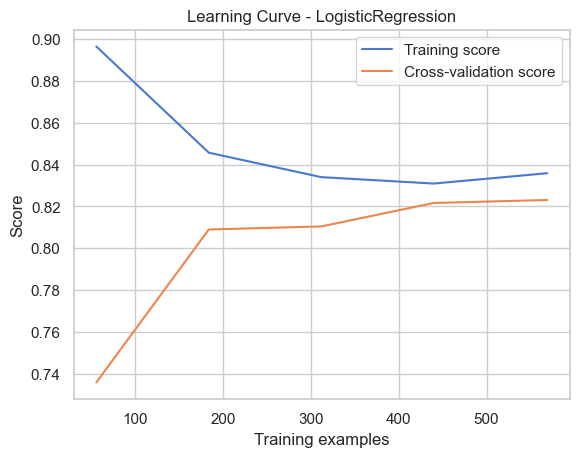

Model                     Accuracy %   SD %      
-------------------------------------------
LogisticRegression        82.59        4.49      


In [139]:
lr = fit_logistic_regression(X_train_scaled, y_train, 9, 1000, "l2", "lbfgs")
plot_learning_curve(lr, X_train_scaled, y_train)
evaluate_model_kfold([lr], X_train, X_train_scaled, y_train, models_to_scale)
# lgtm

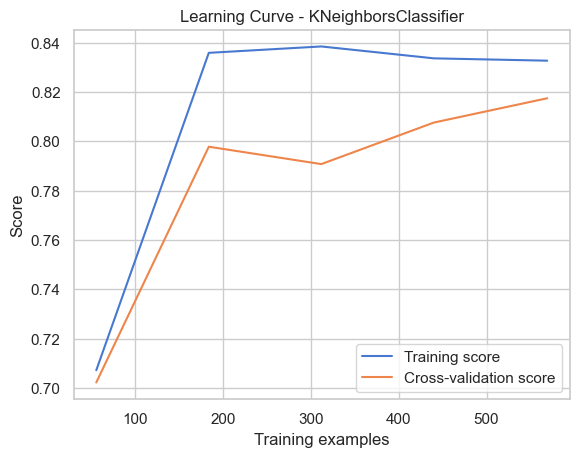

Model                     Accuracy %   SD %      
-------------------------------------------
KNeighborsClassifier      82.30        5.27      


In [140]:
knn = fit_knn(X_train_scaled, y_train, "auto", 1, 12, 1.3, "uniform")
plot_learning_curve(knn, X_train_scaled, y_train)
evaluate_model_kfold([knn], X_train, X_train_scaled, y_train, models_to_scale)
# overfitting

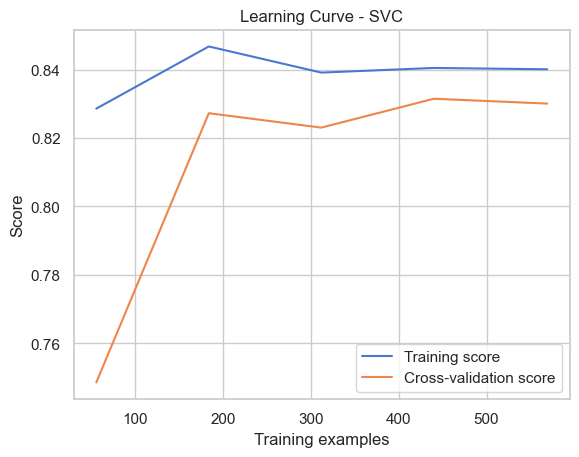

Model                     Accuracy %   SD %      
-------------------------------------------
SVC                       83.43        5.11      


In [141]:
svc = fit_svc(X_train_scaled, y_train, 1.8, 1, 0.05, "rbf")
plot_learning_curve(svc, X_train_scaled, y_train)
evaluate_model_kfold([svc], X_train, X_train_scaled, y_train, models_to_scale)
# some overfitting

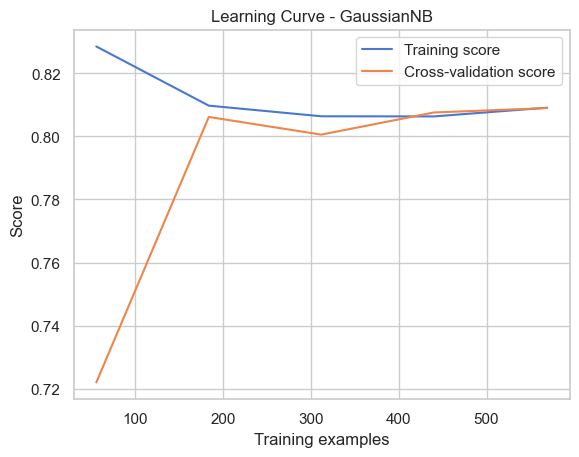

Model                     Accuracy %   SD %      
-------------------------------------------
GaussianNB                80.34        5.13      


In [142]:
nb = fit_nb(X_train, y_train, 1e-05)
plot_learning_curve(nb, X_train, y_train)
evaluate_model_kfold([nb], X_train, X_train_scaled, y_train, models_to_scale)
# clear plateau below 200 records, so model seems too limited for this dataset.

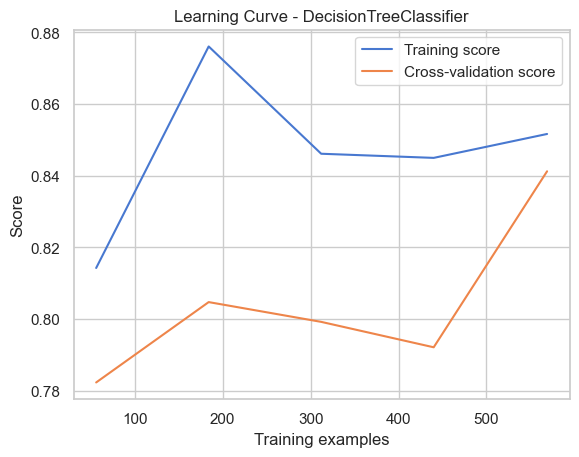

Model                     Accuracy %   SD %      
-------------------------------------------
DecisionTreeClassifier    84.55        3.07      


In [143]:
dt = fit_decision_tree(X_train, y_train, "entropy", 5, 0.75, 22, 6, 2, "best")
plot_learning_curve(dt, X_train, y_train)
evaluate_model_kfold([dt], X_train, X_train_scaled, y_train, models_to_scale)
# overfitting

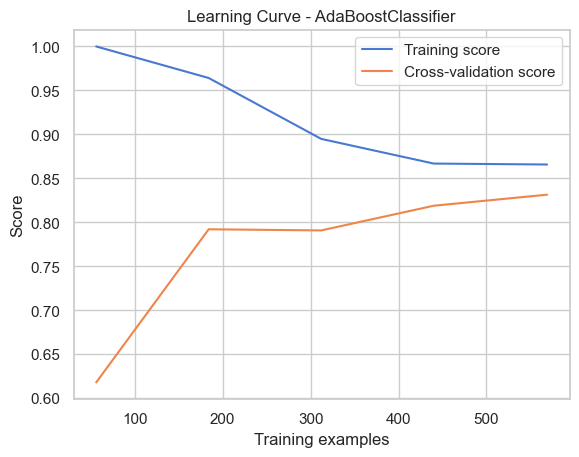

Model                     Accuracy %   SD %      
-------------------------------------------
AdaBoostClassifier        84.70        4.63      


In [144]:
ada = fit_ada_boost(X_train, y_train, DecisionTreeClassifier(max_depth=2), "SAMME", 0.8, 225)
plot_learning_curve(ada, X_train, y_train)
evaluate_model_kfold([ada], X_train, X_train_scaled, y_train, models_to_scale)
# moderate overfitting
# since the validation score is increasing, adding more data could improve the model

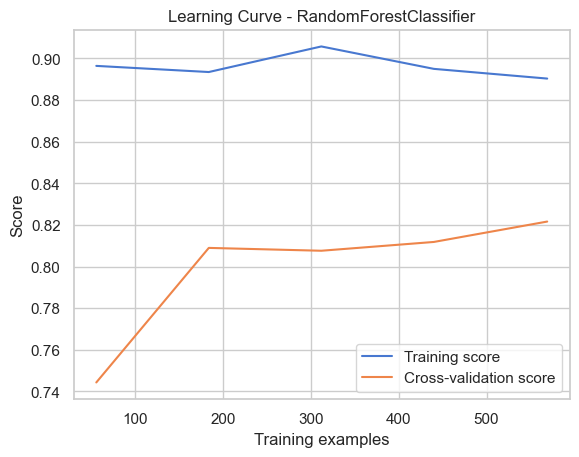

Model                     Accuracy %   SD %      
-------------------------------------------
RandomForestClassifier    84.27        4.58      


In [145]:
rf = fit_random_forest(X_train, y_train, True, None, "entropy", 10, "sqrt", 2, 2, 50)
plot_learning_curve(rf, X_train, y_train)
evaluate_model_kfold([rf], X_train, X_train_scaled, y_train, models_to_scale)
# - some overfitting
# - cross-validation score is lower and flattens out as more training examples are added, 
#   which does not close the gap with the training score -> the model may not generalize
#   as effectively to unseen data

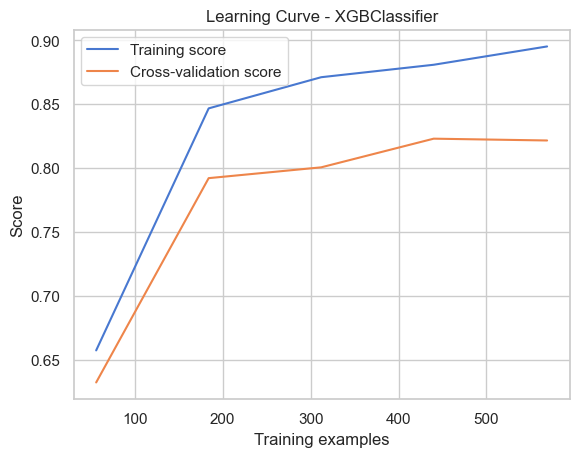

Model                     Accuracy %   SD %      
-------------------------------------------
XGBClassifier             85.40        4.72      


In [146]:
xgb = fit_xgboost(X_train, y_train, 0.7, 0.04, 0.4, 6, 8, 100, 0.8)
plot_learning_curve(xgb, X_train, y_train)
evaluate_model_kfold([xgb], X_train, X_train_scaled, y_train, models_to_scale)
# plateau and overfitting, though validation increases and more data could improve model

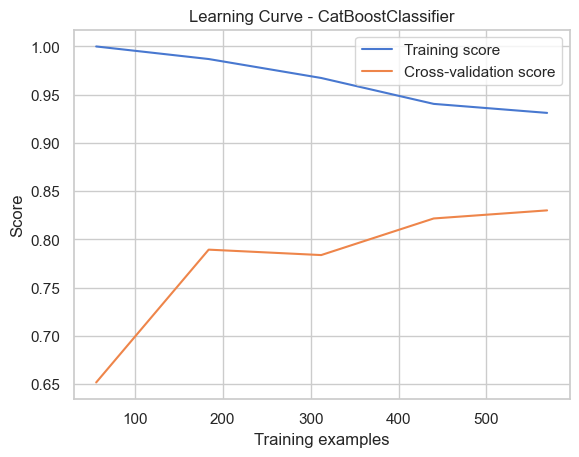

Model                     Accuracy %   SD %      
-------------------------------------------
CatBoostClassifier        84.83        4.46      


In [147]:
"""
- overfitting: training score super high, through validation score keeps improving.
- solution: either tuning hyperparameters or simplifying the model. 
To improve learning curve:
1) Adjust the depth parameter. A shallower tree might reduce overfitting.
2) Lower the learning_rate to slow down learning and potentially improve generalization.
3) Modify l2_leaf_reg to increase regularization strength.
4) Alter the iterations parameter to find a sweet spot where the model neither
   underfits nor overfits.
5) Experiment with subsample to change the fraction of samples used for fitting each tree.

"""
cat = fit_catboost(X_train, y_train, "Bernoulli", 256, 3, "Logloss", 200, 7, 0.2, 1)
plot_learning_curve(cat, X_train, y_train)
evaluate_model_kfold([cat], X_train, X_train_scaled, y_train, models_to_scale)


In [148]:
# Summary
models = [lr, knn, svc, nb, dt, ada, rf, xgb, cat]
evaluate_model_kfold(models, X_train, X_train_scaled, y_train, models_to_scale)

Model                     Accuracy %   SD %      
-------------------------------------------
XGBClassifier             85.40        4.72      
CatBoostClassifier        84.83        4.46      
AdaBoostClassifier        84.70        4.63      
DecisionTreeClassifier    84.55        3.07      
RandomForestClassifier    84.27        4.58      
SVC                       83.43        5.11      
LogisticRegression        82.59        4.49      
KNeighborsClassifier      82.30        5.27      
GaussianNB                80.34        5.13      


### Evaluate Models with (unseen) Test Data
*Only the Top 5*

In [155]:
evaluate_model(svc, X_test_scaled, y_test)

SVC:

1) classification_report:

               precision    recall  f1-score   support

           0       0.80      0.94      0.87        99
           1       0.90      0.71      0.80        80

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.83       179

2) confusion_matrix:

 [[93  6]
 [23 57]] 

3) accuracy_score:

 83.80%


In [152]:
evaluate_model(cat, X_test, y_test)

CatBoostClassifier:

1) classification_report:

               precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.87      0.72      0.79        80

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.82       179

2) confusion_matrix:

 [[90  9]
 [22 58]] 

3) accuracy_score:

 82.68%


In [166]:
evaluate_model(xgb, X_test, y_test)

XGBClassifier:

1) classification_report:

               precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.90      0.68      0.77        80

    accuracy                           0.82       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179

2) confusion_matrix:

 [[93  6]
 [26 54]] 

3) accuracy_score:

 82.12%


In [156]:
evaluate_model(rf, X_test, y_test)

RandomForestClassifier:

1) classification_report:

               precision    recall  f1-score   support

           0       0.79      0.92      0.85        99
           1       0.88      0.70      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179

2) confusion_matrix:

 [[91  8]
 [24 56]] 

3) accuracy_score:

 82.12%


In [ ]:
evaluate_model(dt, X_test, y_test)

DecisionTreeClassifier:

1) classification_report:

               precision    recall  f1-score   support

           0       0.76      0.96      0.85        99
           1       0.93      0.62      0.75        80

    accuracy                           0.81       179
   macro avg       0.84      0.79      0.80       179
weighted avg       0.83      0.81      0.80       179

2) confusion_matrix:

 [[95  4]
 [30 50]] 

3) accuracy_score:

 81.01%


TODO: for kaggle submission